<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20241002_signate_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# 警告の無視
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('/content/train.csv')
df.tail()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
62470,62470,761.806309,3 years,17.469147,D2,10 years,debt_consolidation,677.811665,Individual,FullyPaid
62471,62471,1515.362291,3 years,11.714541,B5,10 years,debt_consolidation,680.872037,Individual,ChargedOff
62472,62472,2284.890713,3 years,18.028881,D4,7 years,debt_consolidation,682.611282,Individual,FullyPaid
62473,62473,1496.725839,3 years,11.197255,B2,10 years,debt_consolidation,710.426103,Individual,FullyPaid
62474,62474,668.503080,3 years,14.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.shape

(62475, 10)

In [128]:
# 欠損値の削除
df = df.dropna()
df.isnull().sum()

,0
id,0
loan_amnt,0
term,0
interest_rate,0
grade,0
employment_length,0
purpose,0
credit_score,0
application_type,0
loan_status,0


In [129]:
df.shape

(62474, 10)

In [130]:
# loan_status を数値に変換
df['loan_status'] = df['loan_status'].map({'ChargedOff': 1, 'FullyPaid': 0})
df.head()
df['term'] = df['term'].str.replace('years', '')
df['term'] = df['term'].str.replace('year', '')
df.head()
df['employment_length'] = df['employment_length'].str.replace('years', '')
df['employment_length'] = df['employment_length'].str.replace('year', '')
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual,0


In [131]:
unique_grades = df['grade'].unique()
print("Unique grades:", unique_grades)

Unique grades: ['A5' 'B1' 'C2' 'C1' 'E5' 'D5' 'B4' 'A3' 'D3' 'C3' 'A2' 'D1' 'A1' 'C5'
 'A4' 'C4' 'E4' 'B2' 'B5' 'D2' 'D4' 'B3' 'E2' 'E1' 'E3' 'F3']


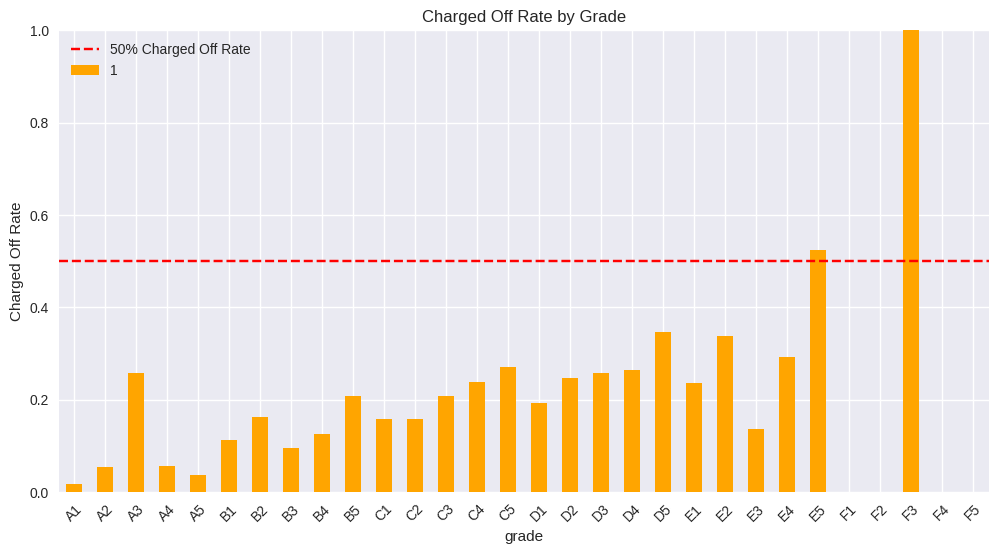

In [133]:
# grade のカスタム順序を指定
grade_order = ['A1', 'A2', 'A3', 'A4', 'A5',
               'B1', 'B2', 'B3', 'B4', 'B5',
               'C1', 'C2', 'C3', 'C4', 'C5',
               'D1', 'D2', 'D3', 'D4', 'D5',
               'E1', 'E2', 'E3', 'E4', 'E5',
               'F1', 'F2', 'F3', 'F4', 'F5']

# grade 列をカテゴリ型として並び替え
df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True)
# 各 grade ごとの Charged Off の割合を計算
charged_off_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_rates = charged_off_rates[1]  # Charged Off のみを抽出

# バーグラフの作成
plt.figure(figsize=(12, 6))
charged_off_rates.plot(kind='bar', color='orange')
plt.ylabel('Charged Off Rate')
plt.title('Charged Off Rate by Grade')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 0から1の範囲で表示
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Charged Off Rate')  # 50%の基準線
plt.legend()
plt.show()

In [135]:
# dfのgrade列をcharged_off_ratesに基づいて数値に変換
df['grade'] = df['grade'].map(charged_off_rates)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,0.038040,0,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,0.113131,10,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,0.158402,1,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,0.157748,0,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,0.523438,10,debt_consolidation,662.972297,Individual,0


In [49]:
# A1〜F5の順番で債務不履行の割合が高まる

In [136]:
unique_purpose = df['purpose'].unique()
print("Unique purpose:", unique_purpose)

Unique purpose: ['debt_consolidation' 'credit_card' 'medical' 'other' 'home_improvement'
 'car' 'major_purchase' 'small_business' 'house']


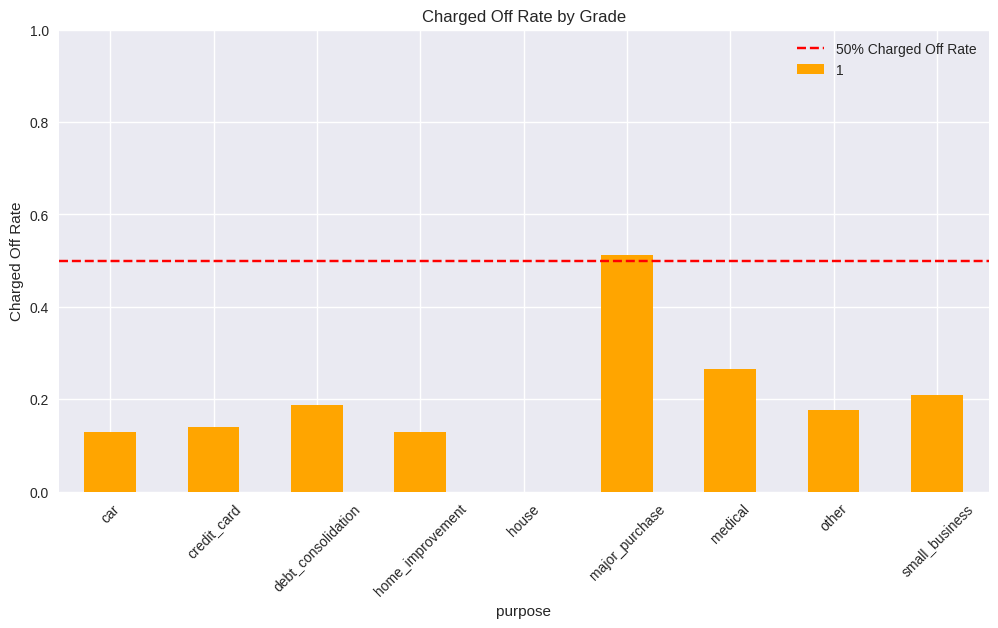

In [137]:
# 各 purpose ごとの Charged Off の割合を計算
charged_off_rates = df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_rates = charged_off_rates[1]  # Charged Off のみを抽出

# バーグラフの作成
plt.figure(figsize=(12, 6))
charged_off_rates.plot(kind='bar', color='orange')
plt.ylabel('Charged Off Rate')
plt.title('Charged Off Rate by Grade')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 0から1の範囲で表示
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Charged Off Rate')  # 50%の基準線
plt.legend()
plt.show()

In [138]:

# purpose 列を数値化
df['purpose'] = df['purpose'].map(charged_off_rates)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,0.038040,0,0.187434,714.061803,Individual,0
1,1,1183.266999,5,10.286776,0.113131,10,0.139925,697.706701,Individual,1
2,2,695.783256,3,14.723425,0.158402,1,0.187434,656.419357,Individual,0
3,3,738.392546,3,14.260708,0.157748,0,0.139925,657.906852,Individual,0
4,4,1642.400654,5,25.217452,0.523438,10,0.187434,662.972297,Individual,0


In [139]:
unique_purpose = df['application_type'].unique()
print("application_type:", unique_purpose)

application_type: ['Individual' 'Joint App']


In [140]:
# 各 purpose ごとの Charged Off の割合を計算
charged_off_rates = df.groupby('application_type')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_rates = charged_off_rates[0]  # Charged Off のみを抽出
print(charged_off_rates)

application_type
Individual    0.824072
Joint App     0.857788
Name: 0, dtype: float64


In [141]:
# application_type を数値に変換
df['application_type'] = df['application_type'].map({'Individual': 1, 'Joint App': 0})
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,0.038040,0,0.187434,714.061803,1,0
1,1,1183.266999,5,10.286776,0.113131,10,0.139925,697.706701,1,1
2,2,695.783256,3,14.723425,0.158402,1,0.187434,656.419357,1,0
3,3,738.392546,3,14.260708,0.157748,0,0.139925,657.906852,1,0
4,4,1642.400654,5,25.217452,0.523438,10,0.187434,662.972297,1,0


In [142]:
df = df.drop(['application_type'], axis=1)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,loan_status
0,0,609.296068,3,8.421982,0.038040,0,0.187434,714.061803,0
1,1,1183.266999,5,10.286776,0.113131,10,0.139925,697.706701,1
2,2,695.783256,3,14.723425,0.158402,1,0.187434,656.419357,0
3,3,738.392546,3,14.260708,0.157748,0,0.139925,657.906852,0
4,4,1642.400654,5,25.217452,0.523438,10,0.187434,662.972297,0


In [143]:
df_num = df.copy()
df_num = df_num.drop(['id'], axis=1)
df_num.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,loan_status
0,609.296068,3,8.421982,0.038040,0,0.187434,714.061803,0
1,1183.266999,5,10.286776,0.113131,10,0.139925,697.706701,1
2,695.783256,3,14.723425,0.158402,1,0.187434,656.419357,0
3,738.392546,3,14.260708,0.157748,0,0.139925,657.906852,0
4,1642.400654,5,25.217452,0.523438,10,0.187434,662.972297,0


In [58]:
# 説明変数xと目的変数tにデータを切り分ける（.valuesでnumpy形式に変換）
x = df_num.drop(['loan_status'], axis=1).values

t = df_num['loan_status']
t

,loan_status
0,0
1,1
2,0
3,0
4,0
...,...
62469,0
62470,0
62471,1
62472,0


In [59]:
# テスト用データセット：学習+検証用データセット = 20　： 80 に分割
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

# 検証用データセット：学習用データセット ＝ 30 ： 70 に分割
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

In [60]:
# 決定木のベースモデルの作成
# モデルの定義
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

# モデルの学習
dtree.fit(x_train, t_train)

# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('validation score : ', dtree.score(x_val, t_val))
# テストデータで精度の確認
print('test score :', dtree.score(x_test, t_test))

train score :  1.0
validation score :  0.7338268640789649
test score : 0.7307723089235695


In [70]:
# テストデータの読み込み
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,242151,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,242153,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual


In [71]:
# loan_status を数値に変換


test_df['term'] = test_df['term'].str.replace('years', '')
test_df['term'] = test_df['term'].str.replace('year', '')
test_df['employment_length'] = test_df['employment_length'].str.replace('years', '')
test_df['employment_length'] = test_df['employment_length'].str.replace('year', '')
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,C1,10,credit_card,682.016083,Individual
1,242151,2257.465815,5,14.196200,C5,10,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3,8.307772,A5,10,credit_card,703.277694,Individual
3,242153,520.284912,3,6.956504,A2,7,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3,11.658497,B3,6,debt_consolidation,698.368991,Individual


In [72]:

# grade 列を数値に変換
test_df['grade'] = test_df['grade'].map(grade_mapping)
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,10,10,credit_card,682.016083,Individual
1,242151,2257.465815,5,14.196200,14,10,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3,8.307772,4,10,credit_card,703.277694,Individual
3,242153,520.284912,3,6.956504,1,7,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3,11.658497,7,6,debt_consolidation,698.368991,Individual


In [73]:
# application_type を数値に変換
test_df['application_type'] = test_df['application_type'].map({'Individual': 1, 'Joint App': 0})
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,10,10,credit_card,682.016083,1
1,242151,2257.465815,5,14.196200,14,10,debt_consolidation,668.240313,1
2,242152,2182.137002,3,8.307772,4,10,credit_card,703.277694,1
3,242153,520.284912,3,6.956504,1,7,debt_consolidation,731.138779,1
4,242154,2303.349549,3,11.658497,7,6,debt_consolidation,698.368991,1


In [74]:
# purpose 列を数値化
test_df['purpose'] = test_df['purpose'].map(purpose_mapping)
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,10,10,4.0,682.016083,1
1,242151,2257.465815,5,14.196200,14,10,6.0,668.240313,1
2,242152,2182.137002,3,8.307772,4,10,4.0,703.277694,1
3,242153,520.284912,3,6.956504,1,7,6.0,731.138779,1
4,242154,2303.349549,3,11.658497,7,6,6.0,698.368991,1


In [84]:
x_test = test_df.drop(['id'], axis=1).values
y = best_model.predict(x_test)
zero_count = (y == 0).sum()

# 結果を表示
print(f"y列の0の数: {zero_count}")
result_df = pd.DataFrame({
    'id': test_df['id'],  # 1列目: test_dfのid列
    'prediction': y       # 2列目: 予測値y
})
result_df.head()

# 列名なしでCSVに保存
result_df.to_csv('submit.csv', index=False, header=False)

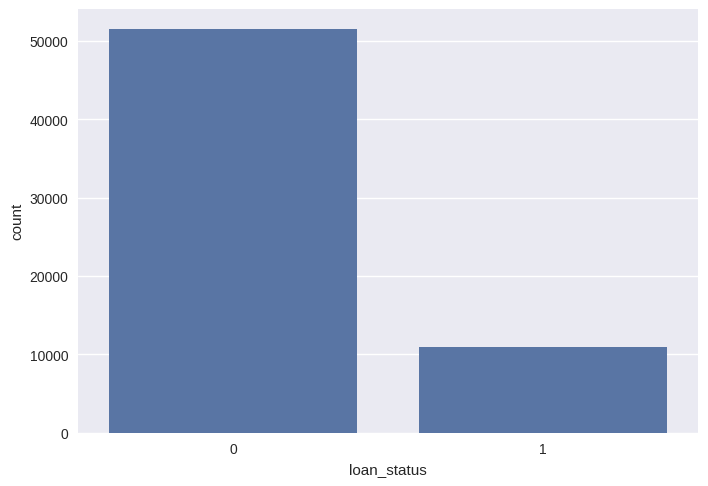

In [87]:
sns.countplot(x="loan_status", data=df_num);

In [109]:
x = df_num.drop(['loan_status'], axis=1).values
t = df_num['loan_status']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# モデルの学習
model.fit(x_train, t_train)
# モデルの検証
print(model.score(x_train, t_train))
print(model.score(x_test, t_test))
# 推論
y_pred = model.predict(x_test)
f1_score = metrics.f1_score(t_test, y_pred, average=None)
f1_score

0.8292972948251812
0.82750893666969


array([0.90424429, 0.13161429])

In [104]:
df_train = pd.DataFrame(x_train)
df_train['loan_status'] = t_train
df_train.head()
# target=0 のサンプルのインデックスを取得（少ない方のカテゴリ）
anomaly_indices = df_train[df_train['loan_status'] == 1].index
num_records = len(anomaly_indices)

print(num_records)
# target=1 のサンプルのインデックスを取得（多い方のカテゴリ）
normal_indices = df_train[df_train['loan_status'] == 0].index

sampled_indices = np.random.choice(normal_indices, num_records, replace=False)

len(sampled_indices)
total_indices = np.concatenate([anomaly_indices, sampled_indices])
print(len(total_indices))
df_undersampled = df_train.iloc[total_indices, :]
# targetとそれ以外を切り分け
x_df_undersampled = df_undersampled.drop('loan_status', axis=1)
t_df_undersampled = df_undersampled[['loan_status']]

10908


In [144]:
# loan_status とその他の変数との相関を計算
correlation_matrix = df_num.corr()

# loan_status との相関を高い順に表示
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)

# 結果を表示
print(correlation_with_target)

loan_status          1.000000
interest_rate        0.269829
grade                0.212519
term                 0.166394
loan_amnt            0.080828
purpose              0.068870
employment_length    0.010534
credit_score        -0.128483
Name: loan_status, dtype: float64


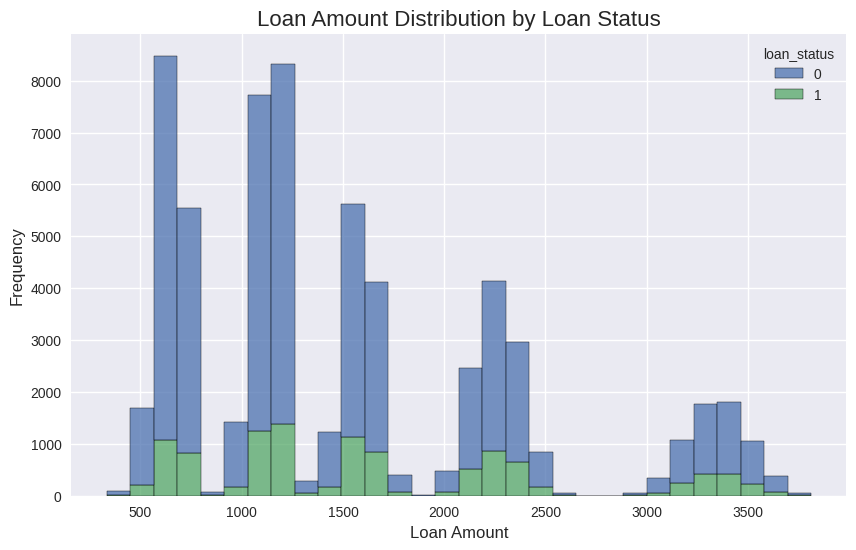

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ヒストグラムの描画
plt.figure(figsize=(10, 6))

# seabornのhistplotを使ってloan_amntをloan_statusごとに表示
sns.histplot(data=df, x='loan_amnt', hue='loan_status', bins=30, kde=False, multiple='stack')

# タイトルとラベルを設定
plt.title('Loan Amount Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# グラフを表示
plt.show()


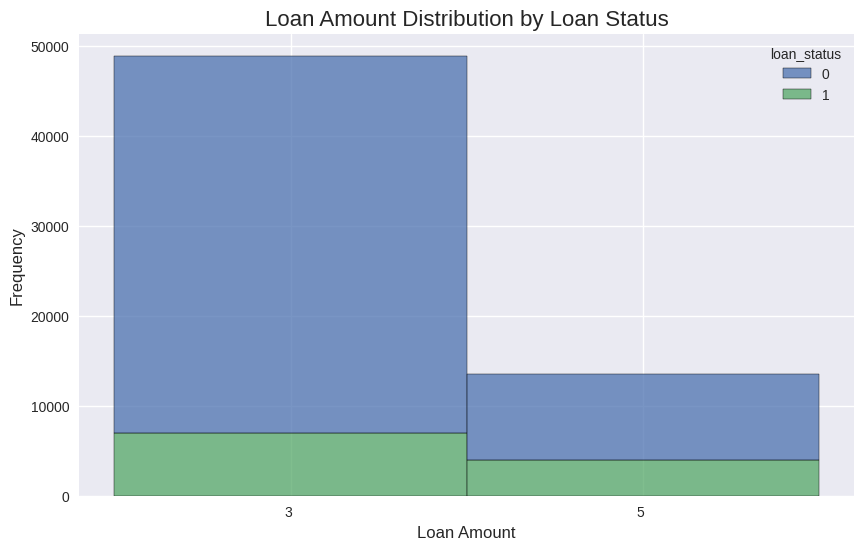

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ヒストグラムの描画
plt.figure(figsize=(10, 6))

# seabornのhistplotを使ってloan_amntをloan_statusごとに表示
sns.histplot(data=df, x='term', hue='loan_status', bins=30, kde=False, multiple='stack')

# タイトルとラベルを設定
plt.title('Loan Amount Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# グラフを表示
plt.show()


In [151]:

df_num = df_num.drop(['loan_amnt', 'purpose','employment_length'], axis=1)
df_num

,term,interest_rate,grade,credit_score,loan_status
0,3,8.421982,0.038040,714.061803,0
1,5,10.286776,0.113131,697.706701,1
2,3,14.723425,0.158402,656.419357,0
3,3,14.260708,0.157748,657.906852,0
4,5,25.217452,0.523438,662.972297,0
...,...,...,...,...,...
62469,3,18.373191,0.193833,677.133121,0
62470,3,17.469147,0.246314,677.811665,0
62471,3,11.714541,0.207901,680.872037,1
62472,3,18.028881,0.263927,682.611282,0


In [152]:
x = df_num.drop(['loan_status'], axis=1).values
t = df_num['loan_status']
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# モデルの学習
model.fit(x_train, t_train)
# モデルの検証
print(model.score(x_train, t_train))
print(model.score(x_test, t_test))
# 推論
y_pred = model.predict(x_test)
f1_score = metrics.f1_score(t_test, y_pred, average=None)
f1_score

0.8252955569275799
0.8246278610681321


array([0.90330931, 0.05843598])

In [159]:
df_train = pd.DataFrame(x_train)
df_train['loan_status'] = t_train
df_train.head()
# target=0 のサンプルのインデックスを取得（少ない方のカテゴリ）
anomaly_indices = df_train[df_train['loan_status'] == 1].index
num_records = len(anomaly_indices)

print(num_records)
# target=1 のサンプルのインデックスを取得（多い方のカテゴリ）
normal_indices = df_train[df_train['loan_status'] == 0].index

sampled_indices = np.random.choice(normal_indices, num_records, replace=False)

len(sampled_indices)
total_indices = np.concatenate([anomaly_indices, sampled_indices])
print(len(total_indices))
df_undersampled = df_train.iloc[total_indices, :]
# targetとそれ以外を切り分け
x_df_undersampled = df_undersampled.drop('loan_status', axis=1)
t_df_undersampled = df_undersampled[['loan_status']]

from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_df_undersampled.values
t = t_df_undersampled['loan_status'].values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)


# モデルの宣言
xgb = XGBClassifier(random_state=0)
# モデルの学習
xgb.fit(x_train, t_train)
# モデルの検証
print(xgb.score(x_train, t_train))
# 推論
y_pred = xgb.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

5454
10908
0.7947609692206942
accuracy :  0.4925145126794989
recall :  [0.50569886 0.47882939]
f1_score : [0.50373469 0.48077524]


In [160]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_pred)
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")
print(f"total: {total}")

precision: [0.50178571 0.48273697]
recall: [0.50569886 0.47882939]
f1_score: [0.50373469 0.48077524]
total: [1667 1606]


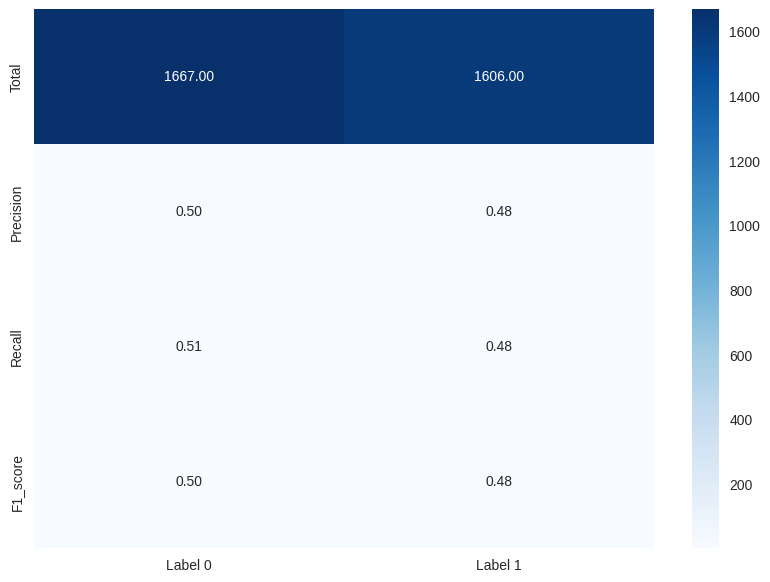

In [161]:
# ヒートマップで可視化
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0','Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.2f', cmap='Blues');

In [166]:
x_test = test_df.drop(['id','loan_amnt', 'purpose','employment_length','application_type'], axis=1).values


In [167]:
y = xgb.predict(x_test)
zero_count = (y == 0).sum()

# 結果を表示
print(f"y列の0の数: {zero_count}")
result_df = pd.DataFrame({
    'id': test_df['id'],  # 1列目: test_dfのid列
    'prediction': y       # 2列目: 予測値y
})
result_df.head()

# 列名なしでCSVに保存
result_df.to_csv('submit1.csv', index=False, header=False)

y列の0の数: 4370
